# GBP to JPY Conversion Statistical Analysis Project

#### Import the relevant libraries

In [56]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



#### Import the relevant dataset

In [57]:

rate_df = pd.read_csv("pound-yen-exchange-rate-historical-chart.csv")
rate_df.head()

,date,value
0,1991-01-02,261.39
1,1991-01-03,259.40
2,1991-01-04,261.00
3,1991-01-07,259.41
4,1991-01-08,259.18


## Exploratory Data Analysis

#### Shape of the DataFrame

In [58]:
rate_df.shape

(8846, 2)

#### Check for null values in the DataFrame

In [59]:
rate_df.isnull().sum()

date      0
 value    0
dtype: int64

#### Check for Duplicate Values

In [60]:
rate_df.duplicated().sum()

0

#### Check data types in the dataframe and get the relevant summary statistics

In [61]:
rate_df.dtypes

rate_df.describe()

,value
count,8846.000000
mean,172.293037
std,31.272447
min,117.020000
25%,147.247950
50%,167.321950
75%,193.675000
max,261.390000


## Data Preprocessing

#### Make the `date` column a Date data type

In [62]:
rate_df["date"] = pd.to_datetime(rate_df["date"])
rate_df.dtypes

date      datetime64[ns]
 value           float64
dtype: object

#### Assigning the index of the dataframe to be the `date` column

In [63]:
rate_df.set_index("date", inplace = True)
rate_df.head()

,value
date,
1991-01-02,261.39
1991-01-03,259.40
1991-01-04,261.00
1991-01-07,259.41
1991-01-08,259.18


#### Check for missing time data

In [95]:
start_date = rate_df.index[0]
end_date = rate_df.index[rate_df.shape[0] - 1]

date_range = pd.date_range(start = start_date, end = end_date, freq = "D")

missing_dates = date_range[~date_range.isin(rate_df.index)]
print(missing_dates)

DatetimeIndex(['1991-01-05', '1991-01-06', '1991-01-12', '1991-01-13',
               '1991-01-19', '1991-01-20', '1991-01-26', '1991-01-27',
               '1991-02-02', '1991-02-03',
               ...
               '2024-07-13', '2024-07-14', '2024-07-20', '2024-07-21',
               '2024-07-27', '2024-07-28', '2024-08-03', '2024-08-04',
               '2024-08-10', '2024-08-11'],
              dtype='datetime64[ns]', length=3431, freq=None)


We observe that there are 3431 missing dates in our dataset. We may be able to visualise this to understand the concentration of the missing date. 

If the missing data is spread out, this can be managed through imputation as generally from day to day the exchange don't vary a lot. However, if there are large chunks such as weeks or months missing imputation may not be feasible the exchange rates can vary a lot in these periods of time.

## Data Visualisation and Processing

Plotting a line graph to visualise the general trend of the exchange rate from 1992.

This can help identify focal points that led to sudden changes in the exchange rate to initiate further research into what potentially caused these sudden changes.

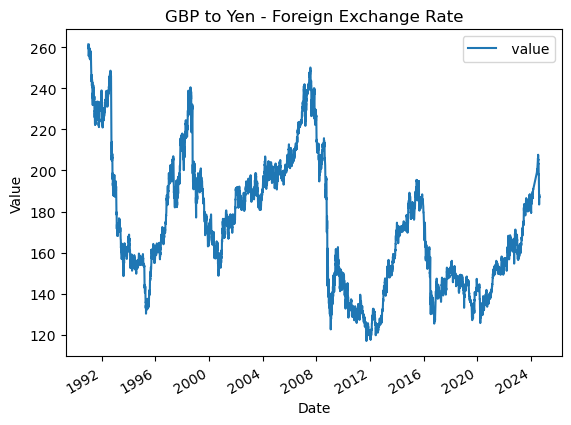

In [68]:
rate_df.plot()
plt.title("GBP to Yen - Foreign Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Value")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.show()

This line plot highlights various peaks and troughs since 1992. For example, we can see around 2008 there is a very sharp drop in the value of Yen in respect to the Pound, which may have been caused by the Global Financial Crisis of 2008. By identifying these peaks and troughs from history we can do further research and understand the various factors effecting the exchange rate.

However, since we are only focusing on the general trend over a long period of time, using daily data may be unnecessary as currently it is not the focus to understand very small changes in the exchange rate. To better visualise the general trend using weekly, monthly or yearly data may be better.

In [73]:
weekly_rate_df = rate_df.resample("M").mean()
print("Number of weekly data points:", weekly_rate_df.shape[0])
weekly_rate_df.head

Number of weekly data points: 404


<bound method NDFrame.head of                  value
date                  
1991-01-31  258.737273
1991-02-28  256.582632
1991-03-31  250.668500
1991-04-30  239.819091
1991-05-31  238.181364
...                ...
2024-04-30         NaN
2024-05-31         NaN
2024-06-30  201.104312
2024-07-31  202.746996
2024-08-31  186.824987

[404 rows x 1 columns]>

<Axes: xlabel='date'>

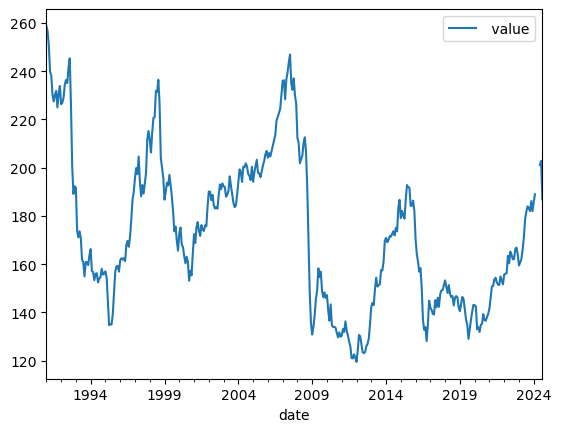

In [74]:
weekly_rate_df.plot()